<h1 align = "center"> Melanoma Detection </h1>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [4]:
# checking how many image files are present in train and test datasets by counting number of jpg files.
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [31]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size = batch_size,validation_split=0.2,subset="training",
    image_size=(img_height, img_width),seed = 123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,validation_split=0.2,subset="validation",
    image_size=(img_height, img_width),seed = 123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

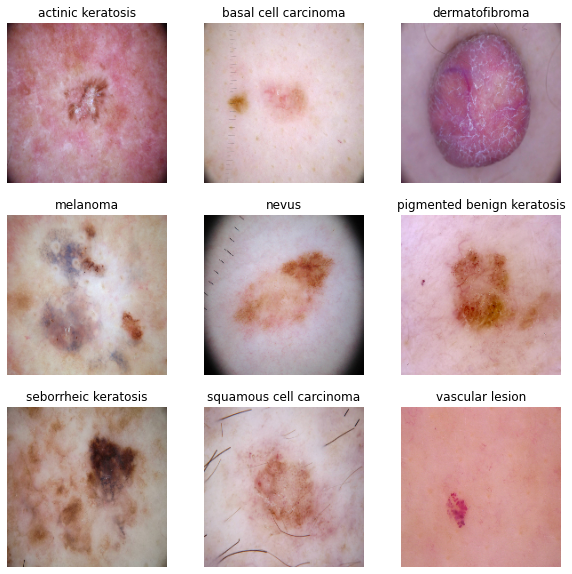

In [9]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize = (10,10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_class = 9
model = Sequential([
    layers.experimental.preprocessing.Rescaling(scale = 1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_class)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 [==============================] - 40s 526ms/step - loss: 1.9400 - accuracy: 0.2937 - val_loss: 1.5769 - val_accuracy: 0.4944
Epoch 2/20
56/56 [==============================] - 25s 455ms/step - loss: 1.5010 - accuracy: 0.4785 - val_loss: 1.3916 - val_accuracy: 0.5213
Epoch 3/20
56/56 [==============================] - 24s 436ms/step - loss: 1.3476 - accuracy: 0.5300 - val_loss: 1.4167 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 25s 441ms/step - loss: 1.1918 - accuracy: 0.5811 - val_loss: 1.3934 - val_accuracy: 0.5436
Epoch 5/20
56/56 [==============================] - 24s 425ms/step - loss: 1.1587 - accuracy: 0.5895 - val_loss: 1.4082 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 25s 449ms/step - loss: 1.0751 - accuracy: 0.6161 - val_loss: 1.3731 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 25s 455ms/step - loss: 0.9685 - accuracy: 0.6699 - val_loss: 1.4218 - val_accuracy: 0.5570

### Visualizing training results

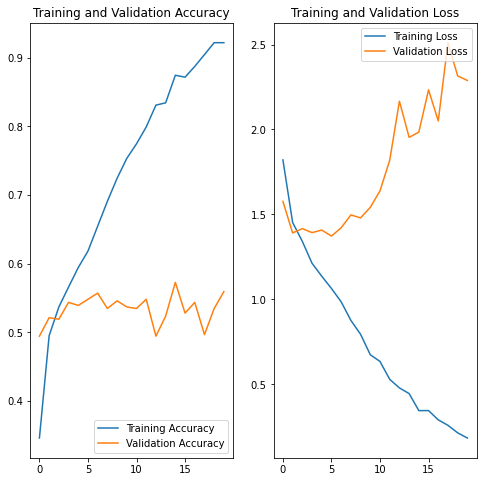

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

It's clearly visible that the model has overfit as training accuracy could rach a maximum of 0.93 which is much higher than the maximum validation accuracy, 0.56. Hence, we need to do appropriate data augmentation so that there will be agreeable overlap between training and validation accuracies. Since colorspace transformation, random erasing, kernal filters and mixing images methods all can cause loss of integrity of the image in our case of melanoma detection and hence lower the accuracy of model, geometric transformations would be the suitable data augmentation to do.

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

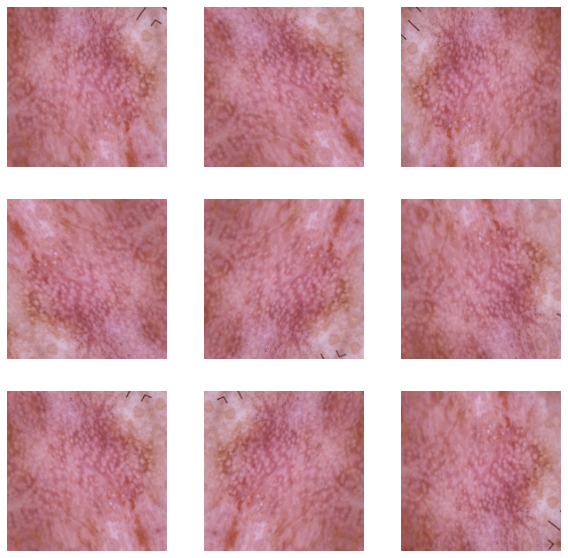

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [45]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
num_class = 9
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255 , input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_class)
])

### Compiling the model

In [46]:
## Your code goes here
model.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [47]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs= 20)

Epoch 1/20
56/56 [==============================] - 71s 1s/step - loss: 2.2222 - accuracy: 0.2046 - val_loss: 1.8681 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 67s 1s/step - loss: 1.8230 - accuracy: 0.3290 - val_loss: 1.6130 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 66s 1s/step - loss: 1.6211 - accuracy: 0.4069 - val_loss: 1.6766 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 1.5922 - accuracy: 0.4238 - val_loss: 1.5471 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 67s 1s/step - loss: 1.4519 - accuracy: 0.4922 - val_loss: 1.3947 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 66s 1s/step - loss: 1.4115 - accuracy: 0.5111 - val_loss: 1.3602 - val_accuracy: 0.5459
Epoch 7/20
56/56 [==============================] - 67s 1s/step - loss: 1.3342 - accuracy: 0.5226 - val_loss: 1.4448 - val_accuracy: 0.5011
Epoch 8/20
56/56 [==

### Visualizing the results

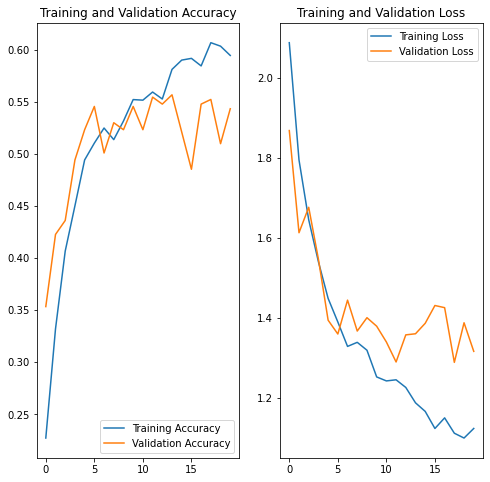

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The model is performing better now, and overfitting is handled after data augmentation and addition of drop out layer, which is evidenced from the similar accuracy values of train and validations sets, which are 0.61 and 0.54 respectively.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.
for i in range(9):
    print(class_names[i])
    path = class_names[i]+'/*.jpg'
    image_count_train = len(list(data_dir_train.glob(path)))
    print(image_count_train)

actinic keratosis
114
basal cell carcinoma
376
dermatofibroma
95
melanoma
438
nevus
357
pigmented benign keratosis
462
seborrheic keratosis
77
squamous cell carcinoma
181
vascular lesion
139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
*Seborrheic Keratosis*
#### - Which classes dominate the data in terms proportionate number of samples?
*Pigmented Benign Keratosis*


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
# !pip install Augmentor

In [49]:
path_list=[]
lesion_list=[]
for i in class_names:   
  for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [51]:
path_to_training_dataset="D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AE8FACD700>: 100%|████████████| 500/500 [00:07<00:00, 66.10 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2AE903524C0>:   0%| | 1/500 [00:00<01:25,  5.85 Sampl

Initialised with 376 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AE8FDB27F0>: 100%|████████████| 500/500 [00:08<00:00, 62.43 Samples/s]
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AE8FB36100>: 100%|████████████| 500/500 [00:08<00:00, 62.09 Samples/s]
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x2AE8EFDAEE0>: 100%|█| 500/500 [00:49<00:00, 10.04 S
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AE8FA71C70>: 100%|████████████| 500/500 [00:41<00:00, 12.14 Samples/s]
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AEF7770340>: 100%|████████████| 500/500 [00:08<00:00, 57.10 Samples/s]
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2AEF11840A0>: 100%|███████████| 500/500 [00:19<00:00, 25.54 Samples/s]
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AEF53B4640>: 100%|████████████| 500/500 [00:08<00:00, 58.62 Samples/s]
Executing Pipeline:   0%|                                                                             | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to D:/Master of AI/IIITB EPG/Assignments/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AEF7770340>: 100%|████████████| 500/500 [00:09<00:00, 53.91 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [52]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [53]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_bde331f3-e911-4ff6-81f3-8f7ee34532e0.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f8fc239c-c4e8-4d55-8aa8-4a5adce6d464.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_bd239db1-032a-47f6-ab7b-9ccb2901a250.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_ff0f9d17-bddd-45e1-8c37-56bb0356decb.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_9c9ae80b-85d1-4664-9840-40096e3acbd8.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [54]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [55]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [56]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [57]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [58]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [70]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size= batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [71]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [72]:
## your code goes here
num_class = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255 , input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_class)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [73]:
## your code goes here
model.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [74]:
epochs = 30
## Your code goes here, use 30 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
169/169 [==============================] - 434s 3s/step - loss: 4.6474 - accuracy: 0.3001 - val_loss: 8.5931 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 402s 2s/step - loss: 1.3739 - accuracy: 0.4994 - val_loss: 3.4065 - val_accuracy: 0.1611
Epoch 3/30
169/169 [==============================] - 401s 2s/step - loss: 1.1276 - accuracy: 0.5844 - val_loss: 3.3994 - val_accuracy: 0.2635
Epoch 4/30
169/169 [==============================] - 401s 2s/step - loss: 0.9440 - accuracy: 0.6549 - val_loss: 2.5737 - val_accuracy: 0.3489
Epoch 5/30
169/169 [==============================] - 400s 2s/step - loss: 0.8113 - accuracy: 0.7017 - val_loss: 1.7373 - val_accuracy: 0.5108
Epoch 6/30
169/169 [==============================] - 396s 2s/step - loss: 0.6563 - accuracy: 0.7513 - val_loss: 1.9324 - val_accuracy: 0.4625
Epoch 7/30
169/169 [==============================] - 401s 2s/step - loss: 0.6080 - accuracy: 0.7800 - val_loss: 2.1548 - val_accuracy: 0.4922

#### **Todo:**  Visualize the model results

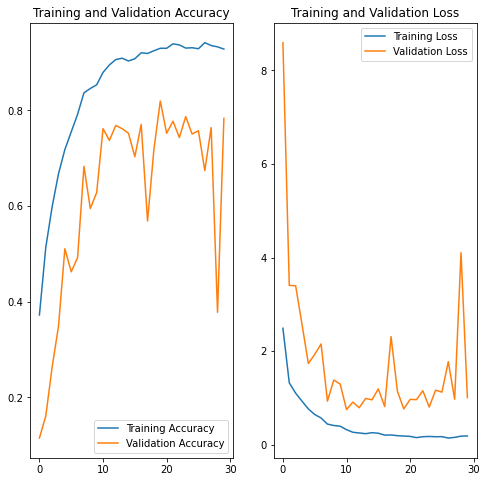

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



<div class="alert alert-block">
    <span style='font-family:Verdana'>
        <b>Findings : </b>
        <ol>
            <li>As the training accuracy increases linearly over time, the validation accuracy also increases in training process.</li>
            <li>As the training loss decreases with epochs, the validation loss decreases significantly.</li>
            <li>The difference in accuracy between training and validation accuracy is less</li>
            <li>The final CNN model, trained on rectified class imbalance data, has a training accuracy of 0.9170 and validation accuracy of 0.7832.</li>
        </ol>
    </span>    
</div>

## Model isn't over fitting anymore. Rebalancing the classes did help to avoid over fitting and improve the accuracy.